---
title: PA 4
author: Marvin (Wenxiang) Li
format:
    html:
        toc: true
        code-fold: true
embed-resources: true
---

#### 1. Prepare the data

```{r}

In [49]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "cleansingWine.csv"

# Load the latest version
cleansingWine = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "dev7halo/wine-information",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

cleansingWine.head()

<ipython-input-49-3a347ef91824>:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  cleansingWine = kagglehub.load_dataset(


/usr/local/lib/python3.11/dist-packages/kagglehub/pandas_datasets.py:91: DtypeWarning: Columns (8,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


,Unnamed: 0,id,name,producer,nation,local1,local2,local3,local4,varieties1,...,use,abv,degree,sweet,acidity,body,tannin,price,year,ml
0,0,137197,Altair,Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,...,Table,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000,2014,750
1,1,137198,"Altair, Sideral",Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,...,Table,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000,2016,750
2,2,137199,Baron du Val Red,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,...,Table,11~12,15~17,SWEET2,ACIDITY3,BODY2,TANNIN2,0,0,750
3,3,137200,Baron du Val White,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,...,Table,11~12,9~11,SWEET1,ACIDITY3,BODY2,TANNIN1,0,0,750
4,4,137201,"Benziger, Cabernet Sauvignon",Benziger,USA,California,NaN,NaN,NaN,Cabernet Sauvignon,...,Table,13~14,17~19,SWEET1,ACIDITY3,BODY3,TANNIN4,0,2003,750


In [50]:
cleansingWine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21605 entries, 0 to 21604
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   21605 non-null  int64 
 1   id           21605 non-null  int64 
 2   name         21605 non-null  object
 3   producer     21605 non-null  object
 4   nation       21603 non-null  object
 5   local1       20705 non-null  object
 6   local2       11145 non-null  object
 7   local3       3591 non-null   object
 8   local4       2 non-null      object
 9   varieties1   21256 non-null  object
 10  varieties2   7518 non-null   object
 11  varieties3   4028 non-null   object
 12  varieties4   1330 non-null   object
 13  varieties5   379 non-null    object
 14  varieties6   105 non-null    object
 15  varieties7   31 non-null     object
 16  varieties8   18 non-null     object
 17  varieties9   7 non-null      object
 18  varieties10  6 non-null      object
 19  varieties11  5 non-null  

In [51]:
zero_count = (cleansingWine['price'] != 0).sum()
print(zero_count)

12512


In [52]:
wine_df = cleansingWine[cleansingWine['price'] != 0]

In [53]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12512 entries, 0 to 21604
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   12512 non-null  int64 
 1   id           12512 non-null  int64 
 2   name         12512 non-null  object
 3   producer     12512 non-null  object
 4   nation       12512 non-null  object
 5   local1       12046 non-null  object
 6   local2       6566 non-null   object
 7   local3       2264 non-null   object
 8   local4       1 non-null      object
 9   varieties1   12346 non-null  object
 10  varieties2   4424 non-null   object
 11  varieties3   2417 non-null   object
 12  varieties4   800 non-null    object
 13  varieties5   229 non-null    object
 14  varieties6   70 non-null     object
 15  varieties7   22 non-null     object
 16  varieties8   10 non-null     object
 17  varieties9   4 non-null      object
 18  varieties10  4 non-null      object
 19  varieties11  3 non-null      o

In [54]:
cleansingWine.columns

Index(['Unnamed: 0', 'id', 'name', 'producer', 'nation', 'local1', 'local2',
       'local3', 'local4', 'varieties1', 'varieties2', 'varieties3',
       'varieties4', 'varieties5', 'varieties6', 'varieties7', 'varieties8',
       'varieties9', 'varieties10', 'varieties11', 'varieties12', 'type',
       'use', 'abv', 'degree', 'sweet', 'acidity', 'body', 'tannin', 'price',
       'year', 'ml'],
      dtype='object')

In [71]:
columns_to_keep = ['nation', 'producer',
       'use', 'sweet', 'acidity', 'body', 'tannin', 'price',
       'year', 'ml']

In [72]:
wine_df_clean = wine_df[columns_to_keep]

In [73]:
print(wine_df_clean[wine_df_clean.isnull().any(axis=1)])


         nation                     producer    use   sweet   acidity   body  \
18139  Portugal               JFaria  Filhos    NaN  SWEET1  ACIDITY1  BODY5   
19241   Moldova  Spirits and Distilled Trade    NaN  SWEET1  ACIDITY4  BODY4   
19973    France                        Ogier    NaN  SWEET1  ACIDITY4  BODY3   
20247    France               Domaine Singla    NaN  SWEET1  ACIDITY3  BODY3   
20286     Spain        Bodegas Parra Jimenez    NaN  SWEET1  ACIDITY2  BODY3   
21246  Slovenia                  Maro Cellar    NaN  SWEET2  ACIDITY3  BODY3   
21247     Italy           Castello di Meleto  Table     NaN  ACIDITY4  BODY4   
21327       USA                Havens Winery    NaN  SWEET1  ACIDITY3  BODY3   
21347     Italy                        LArca  Table     NaN  ACIDITY3  BODY4   

        tannin   price  year   ml  
18139  TANNIN1  320000  2009  750  
19241  TANNIN1   85000     0  500  
19973  TANNIN1  260000  2017  750  
20247  TANNIN3   41000  2018  750  
20286  TANNIN3   19

In [74]:
wine_df_clean.loc[18139, 'use'] = 'Etc'
wine_df_clean.loc[19241, 'use'] = 'Etc'
wine_df_clean.loc[21247, 'sweet'] = 'SWEET1'
wine_df_clean.loc[21347, 'sweet'] = 'SWEET1'
wine_df_clean.loc[19973, 'use'] = 'Table'
wine_df_clean.loc[20247, 'use'] = 'Table'
wine_df_clean.loc[20286, 'use'] = 'Table'
wine_df_clean.loc[21246, 'use'] = 'Appetizer, Table'
wine_df_clean.loc[21327, 'use'] = 'Table'

In [75]:
print(wine_df_clean[wine_df_clean.isnull().any(axis=1)])

Empty DataFrame
Columns: [nation, producer, use, sweet, acidity, body, tannin, price, year, ml]
Index: []


In [76]:
print(wine_df_clean[wine_df_clean['year'] == 0])

                             nation                                producer  \
16                            Italy                         Caviro scaForli   
17                            Italy                         Caviro scaForli   
40                              USA  Gallo Family Vineyard  EJ Gallo Winery   
42                              USA  Gallo Family Vineyard  EJ Gallo Winery   
43                              USA  Gallo Family Vineyard  EJ Gallo Winery   
...                             ...                                     ...   
21569                         Spain                               Murviedro   
21596                           USA                        Cannonball Wines   
21598                         Italy                              Vallebelbo   
21600                        France                    Besserat de Bellefon   
21601  the Republic of South Africa                           Leopards Leap   

                             use   sweet   acidity 

In [77]:
wine_df_clean.loc[:,'year'] = wine_df_clean['year'].replace(0, 2020)

In [78]:
print(wine_df_clean[wine_df_clean['year'] == 0])

Empty DataFrame
Columns: [nation, producer, use, sweet, acidity, body, tannin, price, year, ml]
Index: []


In [79]:
wine_df['producer'].nunique()

3148

In [80]:
print(wine_df_clean[wine_df_clean.isnull().any(axis=1)])

Empty DataFrame
Columns: [nation, producer, use, sweet, acidity, body, tannin, price, year, ml]
Index: []


In [81]:
wine_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12512 entries, 0 to 21604
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   nation    12512 non-null  object
 1   producer  12512 non-null  object
 2   use       12512 non-null  object
 3   sweet     12512 non-null  object
 4   acidity   12512 non-null  object
 5   body      12512 non-null  object
 6   tannin    12512 non-null  object
 7   price     12512 non-null  int64 
 8   year      12512 non-null  int64 
 9   ml        12512 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.3+ MB


#### 2. Modeling

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [83]:
X = wine_df_clean.drop('price', axis=1)
y = wine_df_clean['price']

In [84]:
num_cols = X.select_dtypes(include=['number']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

Running CV forever ElasticNet...
Running CV forever MLPRegressor...
Running CV forever MLPRegressor_2...
Running CV forever RandomForest...
Running CV forever AdaBoost...
Running CV forever XGBoost...
Regressor Comparison Results:
            Model    RMSE (mean)     MAE (mean)  R2 (mean)     CV Time
0    MLPRegressor  220964.341444   88213.647861   0.496577   55.814218
1  MLPRegressor_2  236680.609366  101422.221166   0.414082  278.072956
2         XGBoost  238974.232779   93075.056250   0.417932    2.781703
3    RandomForest  242363.718169   82829.007298   0.398697  359.172372
4      ElasticNet  300175.044627  130814.712054   0.083895    3.606618
5        AdaBoost  364029.366596  289315.669225  -0.418493    1.963972


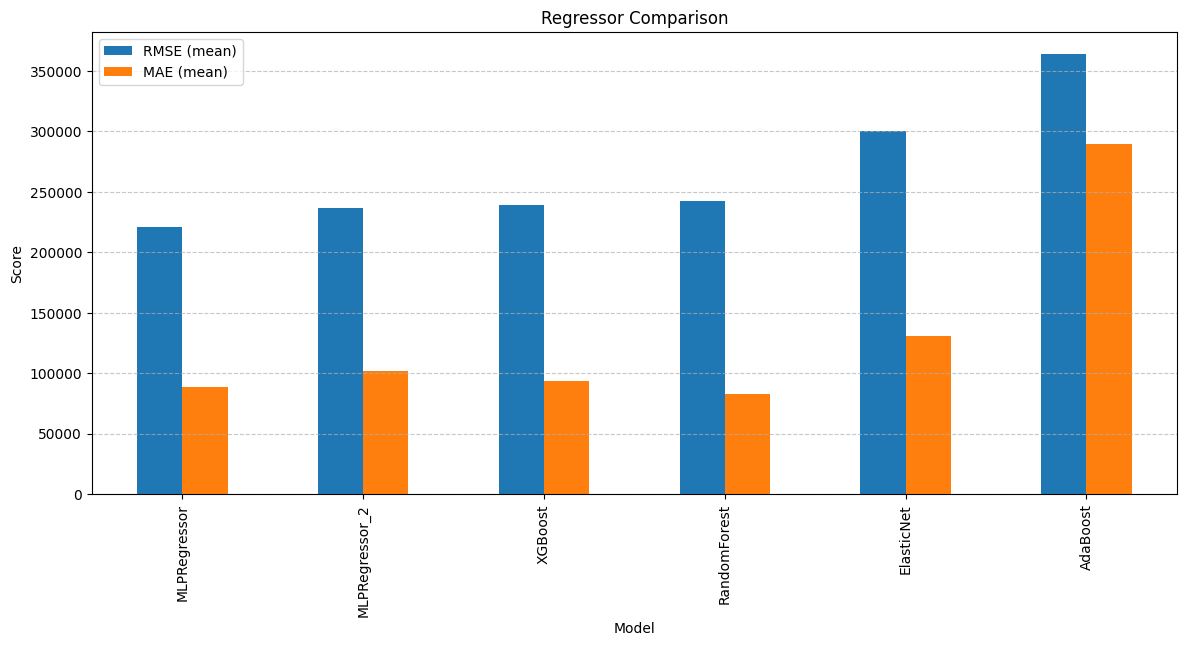

In [85]:
# Preprocess
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])
cat_only_preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])
# Model set
models = {
    'ElasticNet': Pipeline(
        [('preprocessor', preprocessor), ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=5000))]),
    'MLPRegressor': Pipeline(
        [('preprocessor', preprocessor), ('regressor', MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=1500, alpha=0.001, learning_rate_init=0.05,learning_rate = 'adaptive', early_stopping=True, random_state=42))]),
    'MLPRegressor_2': Pipeline(
        [('preprocessor', preprocessor), ('regressor', MLPRegressor(hidden_layer_sizes=(128,), max_iter=1500, alpha=0.001, learning_rate_init=0.05, early_stopping=True, random_state=42))]),
    'RandomForest': Pipeline(
        [('preprocessor', cat_only_preprocessor), ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))]),
    'AdaBoost': Pipeline(
        [('preprocessor', cat_only_preprocessor), ('regressor', AdaBoostRegressor(n_estimators=100, random_state=42))]),
    'XGBoost': Pipeline(
        [('preprocessor', cat_only_preprocessor), ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))])
}

# CV
kf = KFold(n_splits = 5, shuffle=True, random_state=42)
results = []

for name, model in models.items():
  print(f"Running CV forever {name}...")
  rmse_list, mae_list, r2_list = [], [], []
  start_time = time.time()

  for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_list.append(mean_absolute_error(y_test, y_pred))
    r2_list.append(r2_score(y_test, y_pred))

  elapsed = time.time() - start_time

  results.append({
    'Model': name,
    'RMSE (mean)': np.mean(rmse_list),
    'MAE (mean)': np.mean(mae_list),
    'R2 (mean)': np.mean(r2_list),
    'CV Time': elapsed
  })

  results_df = pd.DataFrame(results).sort_values(by = 'RMSE (mean)')
  results_df.reset_index(drop=True, inplace=True)

print("Regressor Comparison Results:")
print(results_df)

#Viz
results_df.plot(x='Model', y=['RMSE (mean)', 'MAE (mean)'], kind='bar', figsize=(14, 6))
plt.title('Regressor Comparison')
plt.ylabel('Score')
plt.grid(axis= 'y', linestyle='--', alpha=0.7)
plt.show()



#### 3. Network Architecture

```{r}


**MLPRegressor (128, 64)**  
Input Layer (number of features)  
↓  
Dense Layer (128 neurons, ReLU)  
↓  
Dense Layer (64 neurons, ReLU)  
↓  
Output Layer (1 neuron, Linear)  

---

**MLPRegressor_2 (128)**  
Input Layer (number of features)  
↓  
Dense Layer (128 neurons, ReLU)  
↓  
Output Layer (1 neuron, Linear)
